<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Practical-Introduction-to-Keras-Callbacks-in-TensorFlow-2" data-toc-modified-id="A-Practical-Introduction-to-Keras-Callbacks-in-TensorFlow-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Practical Introduction to Keras Callbacks in TensorFlow 2</a></span></li><li><span><a href="#CSVLogger" data-toc-modified-id="CSVLogger-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CSVLogger</a></span><ul class="toc-item"><li><span><a href="#Loading-weights" data-toc-modified-id="Loading-weights-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading weights</a></span></li><li><span><a href="#Arguments" data-toc-modified-id="Arguments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Arguments</a></span></li></ul></li><li><span><a href="#ReduceLROnPlateau" data-toc-modified-id="ReduceLROnPlateau-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ReduceLROnPlateau</a></span></li><li><span><a href="#LearningRateScheduler" data-toc-modified-id="LearningRateScheduler-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LearningRateScheduler</a></span></li><li><span><a href="#LambdaCallback" data-toc-modified-id="LambdaCallback-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LambdaCallback</a></span></li></ul></div>

# A Practical Introduction to Keras Callbacks in TensorFlow 2


When training a machine learning model, we would like to have the ability to monitor the model performance and perform certain actions depending on those performance measures. That’s where Keras Callbacks come in.

Callbacks are an important type of object TensorFlow and Keras that are designed to be able to monitor the performance in metrics at certain points in the training run and perform some action that might depend on those performance in metric values.

In this article, we’ll explore the following popular Keras Callbacks APIs with the help of some examples.

   1. EarlyStopping: a callback designed for early stopping.
   2. CSVLogger: a callback streams epoch results to a CSV file.
   3. ModelCheckpoint : a callback to save the Keras model or model weight during training
   4. ReduceLROnPlateau : a callback to reduce the learning rate when a metric has stopped improving.
   5. LearningRateScheduler: a callback for learning rate schedules.
   6. LambdaCallback: a callback for creating custom callbacks on-the-fly.

EarlyStopping() has a few options and by default:

    monitor='val_loss': to use validation loss as performance measure to terminate the training.
    patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

Next, we just need to pass the callback object to model.fit() method.

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
# Helper function to plot metric

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

    
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))
# Fashion MMIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [5]:
X_train_full.shape , X_train_full.dtype 

((60000, 28, 28), dtype('uint8'))

In [6]:
# For faster training, let's use a subset 10,000
X_train, y_train = X_train_full[:10000] / 255.0, y_train_full[:10000]
# Building a NN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(): 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer='sgd', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()



In [8]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[early_stopping]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 1s - loss: 1.5273 - accuracy: 0.5581 - val_loss: 1.0867 - val_accuracy: 0.6600
Epoch 2/50
8000/8000 - 0s - loss: 0.9241 - accuracy: 0.7054 - val_loss: 0.8374 - val_accuracy: 0.7220
Epoch 3/50
8000/8000 - 0s - loss: 0.7673 - accuracy: 0.7514 - val_loss: 0.7529 - val_accuracy: 0.7505
Epoch 4/50
8000/8000 - 0s - loss: 0.6879 - accuracy: 0.7732 - val_loss: 0.6802 - val_accuracy: 0.7730
Epoch 5/50
8000/8000 - 0s - loss: 0.6375 - accuracy: 0.7903 - val_loss: 0.6400 - val_accuracy: 0.7890
Epoch 6/50
8000/8000 - 0s - loss: 0.6019 - accuracy: 0.8015 - val_loss: 0.6217 - val_accuracy: 0.7820
Epoch 7/50
8000/8000 - 0s - loss: 0.5752 - accuracy: 0.8054 - val_loss: 0.5952 - val_accuracy: 0.7995
Epoch 8/50
8000/8000 - 0s - loss: 0.5517 - accuracy: 0.8126 - val_loss: 0.5671 - val_accuracy: 0.8100
Epoch 9/50
8000/8000 - 0s - loss: 0.5344 - accuracy: 0.8183 - val_loss: 0.5764 - val_accuracy: 0.8055


10000/1 - 0s - loss: 58.2185 - accuracy: 0.7607


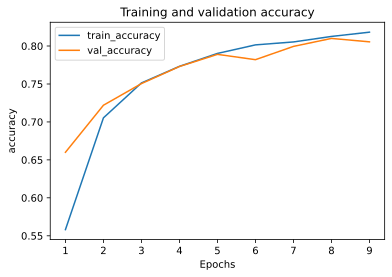

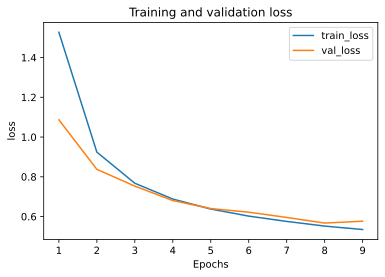

In [9]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

   - monitor='val_loss': to use validation loss as performance measure to terminate the training.
   - patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.
   - min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
   - mode='auto': Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

And here is an example of a customized early stopping:



monitor='val_accuracy' to use validation accuracy as performance measure to terminate the training. patience=3 means the training is terminated as soon as 3 epochs with no improvement. min_delta=0.001 means the validation accuracy has to improve by at least 0.001 for it to count as an improvement. mode='max' means it will stop when the quantity monitored has stopped increasing.

Let’s go ahead, run it with the customized early stopping, and plot the accuracy.

In [10]:
# Create a new model
model = create_model()

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    min_delta=0.001, 
    mode='max'
)
history_custom = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 1s - loss: 1.5766 - accuracy: 0.5394 - val_loss: 1.1429 - val_accuracy: 0.6440
Epoch 2/50
8000/8000 - 0s - loss: 0.9628 - accuracy: 0.6945 - val_loss: 0.8781 - val_accuracy: 0.7165
Epoch 3/50
8000/8000 - 0s - loss: 0.7965 - accuracy: 0.7470 - val_loss: 0.7672 - val_accuracy: 0.7510
Epoch 4/50
8000/8000 - 0s - loss: 0.7128 - accuracy: 0.7696 - val_loss: 0.7154 - val_accuracy: 0.7610
Epoch 5/50
8000/8000 - 0s - loss: 0.6576 - accuracy: 0.7845 - val_loss: 0.6752 - val_accuracy: 0.7600
Epoch 6/50
8000/8000 - 0s - loss: 0.6173 - accuracy: 0.7980 - val_loss: 0.6321 - val_accuracy: 0.7925
Epoch 7/50
8000/8000 - 0s - loss: 0.5869 - accuracy: 0.8087 - val_loss: 0.6069 - val_accuracy: 0.7985
Epoch 8/50
8000/8000 - 0s - loss: 0.5618 - accuracy: 0.8123 - val_loss: 0.5808 - val_accuracy: 0.8080
Epoch 9/50
8000/8000 - 0s - loss: 0.5426 - accuracy: 0.8198 - val_loss: 0.5694 - val_accuracy: 0.8080
Epoch 10/50
8000/8000 - 0s - loss:

10000/1 - 0s - loss: 58.9938 - accuracy: 0.7752


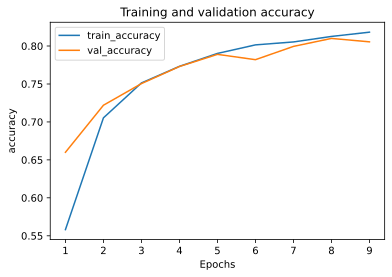

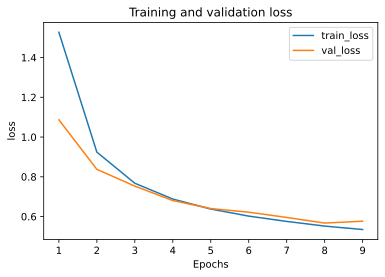

In [11]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

This time, the training gets terminated at Epoch 15 as there are 3 epochs with no improvement on validation accuracy (It has to be ≥ 0.001 to count as an improvement).

![](./i/2bg6f_f4Ky2b2tZJowhYng.png)

# CSVLogger

CSVLogger is a callback that streams epoch results to a CSV file. First, let’s import it and create a CSVLogger object:

In [12]:
from tensorflow.keras.callbacks import CSVLogger

csv_log = CSVLogger("results.csv")

# Create a new model
model = create_model()

history_csv_logger = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[csv_log]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 0s - loss: 1.5974 - accuracy: 0.5401 - val_loss: 1.1440 - val_accuracy: 0.6675
Epoch 2/10
8000/8000 - 0s - loss: 0.9500 - accuracy: 0.7146 - val_loss: 0.8575 - val_accuracy: 0.7285
Epoch 3/10
8000/8000 - 0s - loss: 0.7758 - accuracy: 0.7549 - val_loss: 0.7690 - val_accuracy: 0.7260
Epoch 4/10
8000/8000 - 0s - loss: 0.6956 - accuracy: 0.7721 - val_loss: 0.6955 - val_accuracy: 0.7725
Epoch 5/10
8000/8000 - 0s - loss: 0.6453 - accuracy: 0.7876 - val_loss: 0.6638 - val_accuracy: 0.7655
Epoch 6/10
8000/8000 - 0s - loss: 0.6105 - accuracy: 0.7956 - val_loss: 0.6302 - val_accuracy: 0.7715
Epoch 7/10
8000/8000 - 0s - loss: 0.5860 - accuracy: 0.8029 - val_loss: 0.6005 - val_accuracy: 0.7910
Epoch 8/10
8000/8000 - 0s - loss: 0.5618 - accuracy: 0.8121 - val_loss: 0.5937 - val_accuracy: 0.7935
Epoch 9/10
8000/8000 - 0s - loss: 0.5427 - accuracy: 0.8154 - val_loss: 0.5719 - val_accuracy: 0.8000
Epoch 10/10
8000/8000 - 0s - loss:

In [13]:
# Load the CSV
import pandas as pd

pd.read_csv("results.csv", index_col='epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.540125,1.597377,0.6675,1.144050
1,0.714625,0.950012,0.7285,0.857544
2,0.754875,0.775812,0.7260,0.769048
3,0.772125,0.695553,0.7725,0.695502
4,0.787625,0.645283,0.7655,0.663766
5,0.795625,0.610501,0.7715,0.630155
6,0.802875,0.585973,0.7910,0.600500
7,0.812125,0.561803,0.7935,0.593677
8,0.815375,0.542668,0.8000,0.571860


## Arguments

Apart from the compulsory argument filename, the other 2 options separator and append are likely to be used quite often.


    filename : is the filename of the CSV file.
    separator: string used to separate elements in the CSV file.
    append: is boolean and default to False, True append if file exists (useful for continuing training). False: overwrite existing file.

In [15]:
CSVLogger(csv_log, separator=',', append=False)

In [17]:
pd.read_csv("results.csv", index_col='epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.540125,1.597377,0.6675,1.144050
1,0.714625,0.950012,0.7285,0.857544
2,0.754875,0.775812,0.7260,0.769048
3,0.772125,0.695553,0.7725,0.695502
4,0.787625,0.645283,0.7655,0.663766
5,0.795625,0.610501,0.7715,0.630155
6,0.802875,0.585973,0.7910,0.600500
7,0.812125,0.561803,0.7935,0.593677
8,0.815375,0.542668,0.8000,0.571860


# ModelCheckpoint

ModelCheckpoint is a callback to save the Keras model or model weight during training, so the model or weights can be loaded later to continue the training from the state saved.

First, let’s import it and create a ModelCheckpoint object:

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)



 Next, let’s pass the checkpoint object to model.fit() method for training.

In [21]:
# Create a new model
model = create_model()

history_checkpoint = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[checkpoint]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5

Epoch 00001: saving model to model_checkpoints/
8000/8000 - 1s - loss: 1.5228 - accuracy: 0.5684 - val_loss: 1.0969 - val_accuracy: 0.6615
Epoch 2/5

Epoch 00002: saving model to model_checkpoints/
8000/8000 - 0s - loss: 0.9390 - accuracy: 0.6977 - val_loss: 0.8605 - val_accuracy: 0.7095
Epoch 3/5

Epoch 00003: saving model to model_checkpoints/
8000/8000 - 0s - loss: 0.7862 - accuracy: 0.7387 - val_loss: 0.7673 - val_accuracy: 0.7405
Epoch 4/5

Epoch 00004: saving model to model_checkpoints/
8000/8000 - 0s - loss: 0.7070 - accuracy: 0.7666 - val_loss: 0.7034 - val_accuracy: 0.7615
Epoch 5/5

Epoch 00005: saving model to model_checkpoints/
8000/8000 - 0s - loss: 0.6545 - accuracy: 0.7824 - val_loss: 0.6714 - val_accuracy: 0.7720


In [22]:
get_test_accuracy(model, X_test, y_test)

accuracy: 0.757


## Loading weights

Let’s create a new model new_model to demonstrate how loading weights work. And by running get_test_accuracy(new_model, X_test, y_test), we get the test accuracy 0.086 for a model without loading any trained weights.

In [23]:
# Create a new model
new_model = create_model()# Without loading weight
get_test_accuracy(new_model, X_test, y_test)

accuracy: 0.085


Next, let’s load weights with load_weights('model_checkpoints/') and get its test accuracy again. This time, we should be able to see the same accuracy as we trained the model model .



In [26]:
# Load weights
new_model.load_weights('model_checkpoints/')
get_test_accuracy(new_model, X_test, y_test)

accuracy: 0.757


## Arguments

Below are the commonly used arguments you should know when using ModelCheckpoint callback

   - filepath: string or PathLike, the path to save the model file. filepath can contain named formatting options, for example, if filepath is weights.{epoch:02d}-{val_loss:.2f}, then the model checkpoints will be saved with the epoch number and the validation loss in the filename.
   - save_freq: 'epoch' or integer. When using 'epoch', the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches.
   - save_weights_only: if True, then only the model’s weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)).

# ReduceLROnPlateau

ReduceLROnPlateau is a callback to reduce the learning rate when a metric has stopped improving. This callback monitors a quantity and if no improvement is seen for a patience number of epochs, the learning rate is reduced by factor value (new_lr = lr * factor). Let’s see how this works with the help of an example.

First, let’s import it and create a ReduceLROnPlateau object:

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

monitor='val_loss' to use validation loss as performance measure to reduce the learning rate. patience=2 means the learning rate is reduced as soon as 2 epochs with no improvement. min_delta=0.001 means the validation loss has to improve by at least 0.001 for it to count as an improvement. factor=0.2 means the new learning rate will be reduced as 

- new_lr = lr * factor.

Let’s train the model with the reduce_lr callback

In [28]:
# Create a new model
model = create_model()

history_reduce_lr = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[reduce_lr]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 1s - loss: 1.5465 - accuracy: 0.5505 - val_loss: 1.0949 - val_accuracy: 0.6680
Epoch 2/50
8000/8000 - 0s - loss: 0.9278 - accuracy: 0.6949 - val_loss: 0.8483 - val_accuracy: 0.7040
Epoch 3/50
8000/8000 - 0s - loss: 0.7748 - accuracy: 0.7396 - val_loss: 0.7558 - val_accuracy: 0.7380
Epoch 4/50
8000/8000 - 0s - loss: 0.7020 - accuracy: 0.7645 - val_loss: 0.7067 - val_accuracy: 0.7525
Epoch 5/50
8000/8000 - 0s - loss: 0.6551 - accuracy: 0.7779 - val_loss: 0.6748 - val_accuracy: 0.7655
Epoch 6/50
8000/8000 - 0s - loss: 0.6181 - accuracy: 0.7943 - val_loss: 0.6310 - val_accuracy: 0.7825
Epoch 7/50
8000/8000 - 0s - loss: 0.5896 - accuracy: 0.8035 - val_loss: 0.6281 - val_accuracy: 0.7655
Epoch 8/50
8000/8000 - 0s - loss: 0.5692 - accuracy: 0.8085 - val_loss: 0.5920 - val_accuracy: 0.8030
Epoch 9/50
8000/8000 - 0s - loss: 0.5483 - accuracy: 0.8149 - val_loss: 0.5830 - val_accuracy: 0.7915
Epoch 10/50
8000/8000 - 0s - loss:

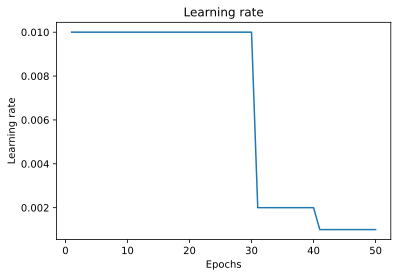

In [29]:
plot_lr(history_reduce_lr)

You should get an output like above. In the above output, the ReduceLROnPlateau callback has been triggered at Epoch 30 and 37.

10000/1 - 0s - loss: 63.9566 - accuracy: 0.8133


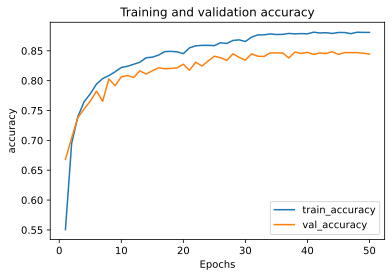

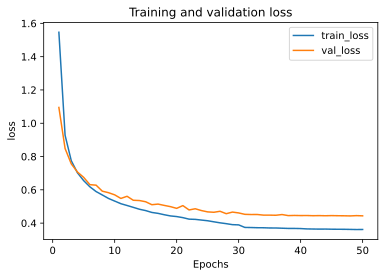

In [30]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history_reduce_lr, 'accuracy')
plot_metric(history_reduce_lr, 'loss')

Arguments

Below are the commonly used arguments you should know when using ReduceLROnPlateau callback

   - monitor='val_loss': to use validation loss as performance measure to reduce the learning rate.
   - factor: the factor by which the learning rate will be reduced. new_lr = lr * factor.
   - patience: is the number of epochs with no improvement.
   - min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
   - mode='auto': Should be one of auto, min or max. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode learning rate will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
   - min_lr: lower bound on the learning rate.

# LearningRateScheduler

When training a neural network, it is often useful to reduce the learning rate as the training progresses. This can be done by using learning rate schedules or adaptive learning rate. LearningRateScheduler is a built-in callback for learning rate schedules.

For more details about learning rate schedules, please check out the following article:


lr_decay() takes 2 arguments epoch (current epoch) &lr( current learning rate), and returns a new learning rate. Ourlr_decay() function will reduce the learning rate by a factor of 0.2 in every 5 epochs.

In [32]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_decay(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        return lr * 0.2
    return lr

# Create a new model
model = create_model()

history_lr_schedule = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[LearningRateScheduler(lr_decay, verbose=1)]
)

Train on 8000 samples, validate on 2000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/20
8000/8000 - 0s - loss: 1.5878 - accuracy: 0.5329 - val_loss: 1.1268 - val_accuracy: 0.6510

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/20
8000/8000 - 0s - loss: 0.9557 - accuracy: 0.7060 - val_loss: 0.8650 - val_accuracy: 0.7210

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 3/20
8000/8000 - 0s - loss: 0.7883 - accuracy: 0.7487 - val_loss: 0.7578 - val_accuracy: 0.7465

Epoch 00004: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 4/20
8000/8000 - 0s - loss: 0.7068 - accuracy: 0.7697 - val_loss: 0.7003 - val_accuracy: 0.7635

Epoch 00005: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 5/20
8000/8000 - 0s - loss: 0.6568 - accuracy: 0.7829 - val_loss: 0.6644 - val_accuracy: 0.7735

Epoch 00006: Learning

10000/1 - 0s - loss: 41.5033 - accuracy: 0.7681


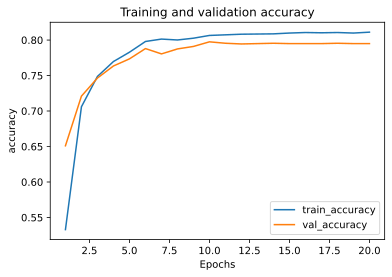

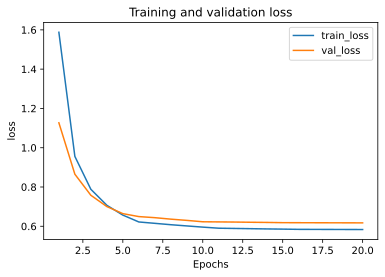

In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history_lr_schedule, 'accuracy')
plot_metric(history_lr_schedule, 'loss')

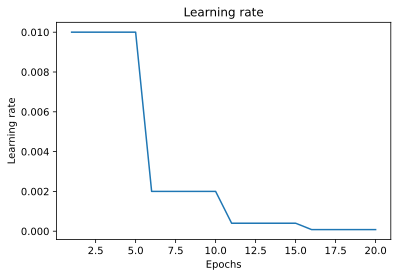

In [34]:
plot_lr(history_lr_schedule)

# LambdaCallback

Another useful callback is LambdaCallback. It is similar to Callback and allows us to build custom callbacks on-the-fly.

LambdaCallback is constructed with the following anonymous functions that will be called at the appropriate time.

   - on_epoch_begin: called at the beginning of every epoch.
   - on_epoch_end: called at the end of every epoch.
   - on_batch_begin: called at the beginning of every batch.
   - on_batch_end: called at the end of every batch.
   - on_train_begin: called at the beginning of model training.
   - on_train_end: called at the end of model training.

Note that the callbacks expect positional arguments, as:

   - on_epoch_begin and on_epoch_end expect two positional arguments: epoch, logs
   - on_batch_begin and on_batch_end expect two positional arguments: batch, logs
   - on_train_begin and on_train_end expect one positional argument: logs

Let’s see how LambdaCallback works with the help of an example.

First, let’s import it and create 3 different LambdaCallback:

In [35]:
from tensorflow.keras.callbacks import LambdaCallback

epoch_callback = LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1))
)

batch_loss_callback = LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
)

train_finish_callback = LambdaCallback(
    on_train_end=lambda logs: print('Training finished!')
)

# Create a new model
model = create_model()

history_lambda_callback = model.fit(
    X_train, 
    y_train,
    epochs=2,                  # change epoch to 2 for demo purpose 
    validation_split=0.20, 
    batch_size=2000,           # change to 2000 for demo purpose
    verbose=False,
    callbacks=[epoch_callback, batch_loss_callback, train_finish_callback]
)

Starting Epoch 1!

 After batch 0, the loss is    2.73.

 After batch 1, the loss is    2.58.

 After batch 2, the loss is    2.51.

 After batch 3, the loss is    2.40.
Starting Epoch 2!

 After batch 0, the loss is    2.37.

 After batch 1, the loss is    2.33.

 After batch 2, the loss is    2.29.

 After batch 3, the loss is    2.26.
Training finished!


10000/1 - 0s - loss: 89.4616 - accuracy: 0.1758


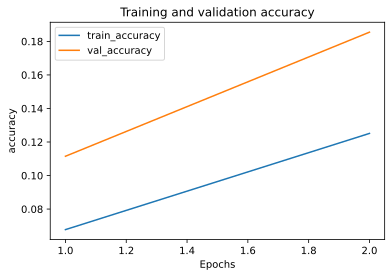

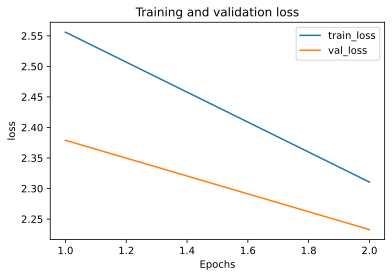

In [38]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history_lambda_callback, 'accuracy')
plot_metric(history_lambda_callback, 'loss')

Other callback functions

Along with the above functions, there are other callbacks that you might encounter or want to use in your Deep Learning project:

    Callback: this is the base class used to build custom callback. It is similar to LambdaCallback but much powerful. We will have another discussion for it.
    TensorBoard: a callback writes a log for TensorBoard, which is TensorFlow’s excellent visualization tool.
    RemoteMonitor: a callback used to stream events to a server.